# **Rahul Sandireddy (20BCE1001)**
VIT Chennai

# **AI Assignment - 2**
**Build an ANN model for Drug classification**


# **Task 1**: Read the dataset and do data pre-processing

In [21]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [22]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **Data Preprocessing**

In [25]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [26]:
# Finding unique category
df['Drug'].unique() 

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [27]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [28]:
df.shape

(200, 6)

In [29]:
# Check for dataset information
df.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

# Visualization

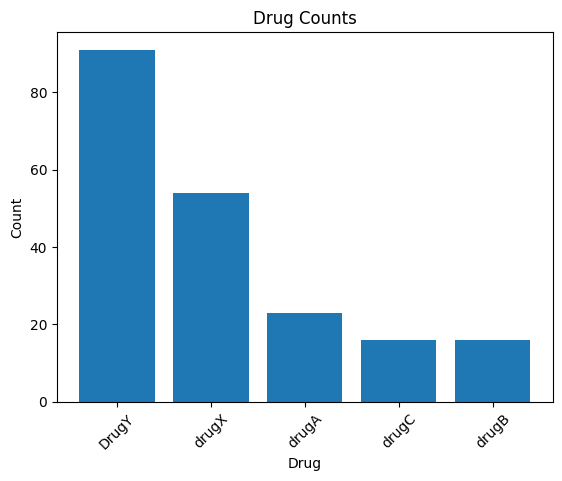

In [30]:
drug_counts = df['Drug'].value_counts()

# Plot bar chart of drug counts
plt.bar(drug_counts.index, drug_counts.values)
plt.title('Drug Counts')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

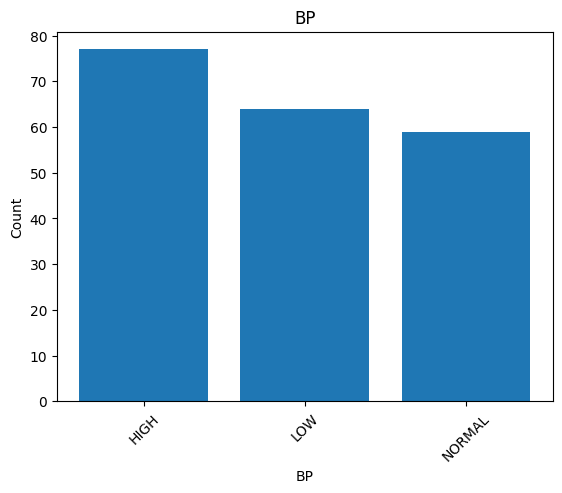

In [31]:
BP_counts = df['BP'].value_counts()

# Plot bar chart of drug counts
plt.bar(BP_counts.index, BP_counts.values)
plt.title('BP')
plt.xlabel('BP')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

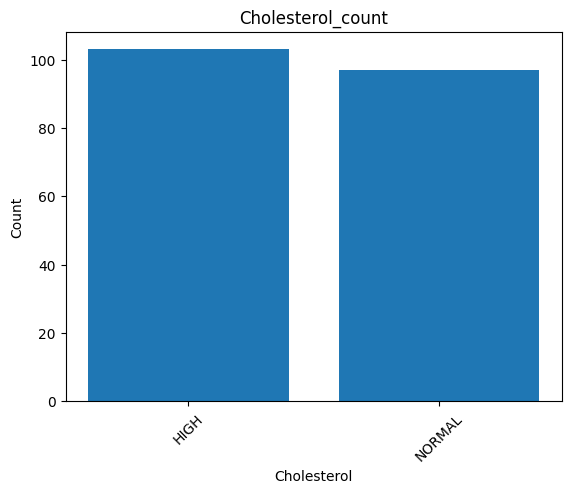

In [32]:
Cholesterol_counts = df['Cholesterol'].value_counts()

# Plot bar chart of drug counts
plt.bar(Cholesterol_counts.index, Cholesterol_counts.values)
plt.title('Cholesterol_count')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Segregating the data into train & test

In [33]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [34]:
Y_class = len(np.unique(y))
Y_class

5

# Convert the Categorical data into interger data

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])

# BP, Cholestero columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2, 3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Drug column
encoder = OneHotEncoder()
encoded_Y = encoder.fit(y.reshape(-1,1))
y = encoded_Y.transform(y.reshape(-1,1)).toarray()


# Split the data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Task 2** : Build the ANN model with (input layer, min 3 hidden layers & output layer)

model building 

In [38]:
model = Sequential()
model.add(Dense(48, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(Y_class,activation='softmax'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                432       
                                                                 
 dense_1 (Dense)             (None, 36)                1764      
                                                                 
 dense_2 (Dense)             (None, 24)                888       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 5)                 65        
                                                                 
Total params: 3,449
Trainable params: 3,449
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 1.6581 - accuracy: 0.2500
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 1.5236 - accuracy: 0.3857
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 1.4299 - accuracy: 0.4643
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 1.3491 - accuracy: 0.4857
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 1.2775 - accuracy: 0.4929
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 1.2035 - accuracy: 0.4929
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 1.1369 - accuracy: 0.5357
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0723 - accuracy: 0.5643
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 1.0073 - accuracy: 0.5929
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.9418 - accuracy: 0.6429
Epoch 11/100
5/5 [===========

In [42]:
# Save the model to Google Drive
model.save('/content/drive/MyDrive/ai_assign.h5')


# **Task 3**: Test the model with random data

In [43]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [44]:
y_pred_outcome = []
for output in y_pred:
    output_list = [0] * Y_class
    output_list[np.where(output == max(output))[0][0]] = 1
    y_pred_outcome.append(output_list)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred_outcome)

0.9666666666666667

# Taking random Value

In [47]:
user_input = np.array([[1.0, 1.0, 1.0, 0, 0.0, 23, 0, 25.355]])
user_input_scaled = sc.transform(user_input)


array([[ 1.20670641,  1.55390931,  1.52752523, -1.12163475, -0.89155583,
        -1.40583231, -1.08972474,  1.36284704]])

In [49]:
predictions = model.predict(user_input_scaled)
predictions 

1/1 [==============================] - 0s 69ms/step


array([[1.0000000e+00, 4.2416654e-11, 1.1251494e-08, 7.9643643e-09,
        4.9756133e-09]], dtype=float32)

In [50]:
y_pred_outcome = []
for output in predictions :
    output_list = [0] * Y_class
    output_list[np.where(output == max(output))[0][0]] = 1
    y_pred_outcome.append(output_list)

In [51]:
y_pred_outcome

[[1, 0, 0, 0, 0]]